In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
#from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Data Gathering and Preprocessing

In [ ]:
# getting the dataset from the sklearm datasets
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
#Converting the dataset to tabular format using pandas
# that columns part names the header of the table to their names instead of index like 0,1,2...
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns = house_price_dataset.feature_names)

In [ ]:
# Adding the prices from the dataset to the dataframe as Price column
house_price_dataframe['Price'] = house_price_dataset.target

In [ ]:
# Checking the tabular data
house_price_dataframe.head()
print(house_price_dataframe.shape)

(20640, 9)


In [ ]:
# checking how many faulty(empty) data entries in out dataframe
# Since our Data has 0 empty entries there is no need to clean the data further
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
# Getting the Summary of our data
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Getting the correlation between the columns to check how out features related to each other
correlation = house_price_dataframe.corr()

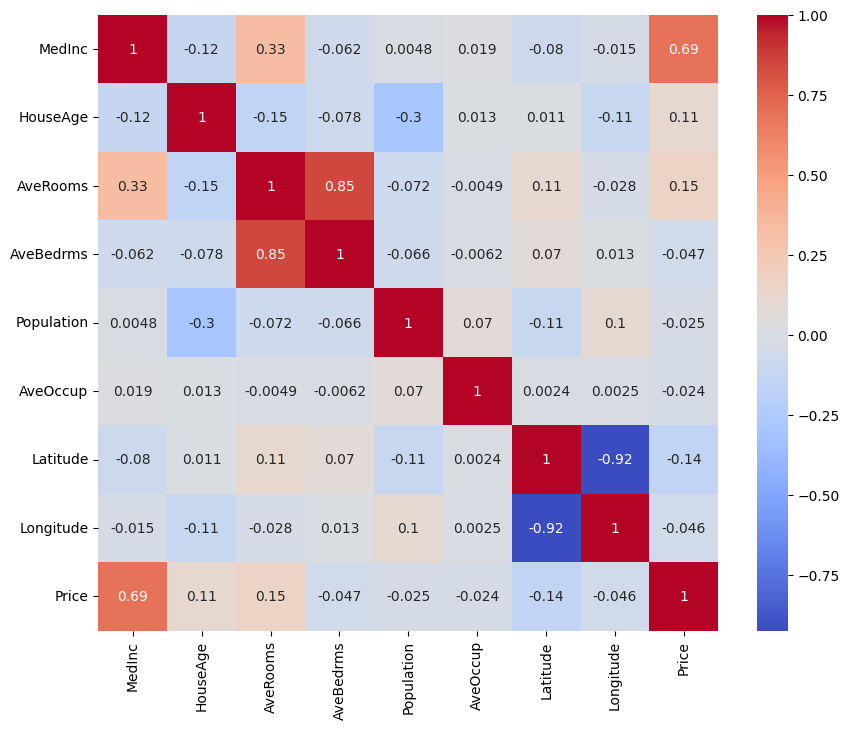

In [ ]:
# Create a heatmap of the correlation matrix
# using the Colab AI for the first time
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Splitting our Price column so that we can get out features as input and output
# here axis = 1 drops Prices column if axis were to be 0 it would drop a row
X = house_price_dataframe.drop(["Price"],axis = 1)
Y = house_price_dataframe['Price']

In [ ]:
# This train_test_split splits our data into training and testing data here test_size = 0.2 means 20% data for testing and random_state is just to randomize with entries to take where
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.2 , random_state=2)

## Model Training

XGBoost Regressor

In [ ]:
# Since we are using XGBoost regressor model here we initialize the model
model = XGBRegressor()

In [ ]:
# here we trained our model to the training data
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation

###Prediction on the training data

In [ ]:
# here we are using our trained model to predict the output values from the training data that are equivalent to Y_train
training_data_prediction = model.predict(X_train)

In [ ]:
# here we are using metrices to get the score for different evaluation schemes
score_1 = metrics.r2_score(Y_train,training_data_prediction)

score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared Error: ",score_1)
print("Mean Absolute Error: ", score_2)

R Squared Error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


Visualizing the actual and predicted prices

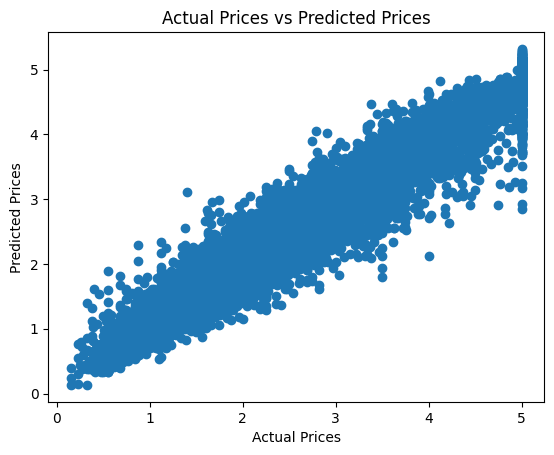

In [ ]:
# here we visualize the predicted and the actual data
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

###Prediction of Testing data

In [ ]:
# Now we test out data accuracy on the testing data
testing_data_prediction = model.predict(X_test)

In [ ]:
score_3 = metrics.r2_score(Y_test,testing_data_prediction)

score_4 = metrics.mean_absolute_error(Y_test,testing_data_prediction)

print("R Squared Error: ",score_3)
print("Mean Absolute Error: ", score_4)

R Squared Error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186
